# K-th Symbol in Grammar
We build a table of n rows(1-indexed). We start by writing 0 in the 1st row. Now in every subsequent row, we look at the previous row and replace each occurrence of 0 with 01, and each occurrence of 1 with 10. 

For example, for n = 3, the 1st row is 0, the 2nd row is 01, and the 3rd row is 0110.

Given two integer n and k, return the kth (1-indexed) symbol in the nth row of a table of n rows. 

- 0 -->n=1
- 01 -->n=2
- 00110 --> n-3
- k =1 return 1
- k=2 return 1
- k=3 return 1
- k=4 return 4

### Clarifying questions
1. Is it possbile that n is given as zero? No, n >=1
2. Can k be out of bound? For e.g. if n =3, there will be 4 numbers, can k be given as 5? No, 1 <= k <= 2

### Test cases
Can form together with interviewer
- 0: n=1, k=1 -> return 0
- 01
- 0110
- 01101001 n=4, k=1 -> 0
        n=4, k=8 -> 1

### Pseudocode

kgrams
base case: if n = 1 return 0
recursive case: find length = 2^n-1, 
mid points length // 2
if k <= half
return kgram(n-1, k)
else
return not kgram(n-1, k-mid)

In [58]:
def kth_symbol(n,k):
    # 0
    #01
    #0110
    # Base case
    if n==1:
        return 0
    # do this because each subsequent row is twice as longs as the previous row
    length = 2**(n-1)
    # determine if kth symbol is on the first half or second half
    mid = length // 2
    # checks condition
    if k <=mid:
        # decrement n and return the value at k position
        return kth_symbol(n-1, k)
    else:
        # k-mid resets the index. So, we get a value from the first half of the list
        return int(not kth_symbol(n-1, k-mid))

if __name__ == '__main__':
    result = kth_symbol(2,3)
    print(result)


1


- 0: n =1, length =1
- 01: n=2, lenght = 2
- 0110: n=3, length = 4
- 01101001: n=4, length = 8
- 01101001: n=5, length = 16

### Complexity Analysis
Time Complexity = O(n)
Space Complexity = O(n)


# Problem 2
Josephus problem: Find the Winner of the Circular Game. \
There are n friends that are playing a game. The friends are sitting in a circle and are numbered from 1 to n in clockwise order. More formally, moving clockwise from the ith firend brings you to the (i+1)th friend for 1 <= i< n, and moving clockwise from the nth friend brings you to the 1st friend. 
The fules of the game are as follows:
1. Start at the 1st friend
2. Count the next k friends in the clockwise direction inclding the friend you started at. The counting wraps around the circle and may count some friends more than once. 
3. The last friend you counted leaves the cirlce and loses the game. 
4. If there is still more than one friend in the circle, go back to step 2 starting from the friend immediately clockwise of the friend who just lost and repeat.
5. Else, the last friend in the circle wins the game.

Given the number of friends , n, and an integer k, return the winner of the game


#### Pseudocode
start at the first friend\
count all the friend you have in clockwise order\
the kth friend you count loses the game\
if length is greater than 1\
count again and elimate kth friend\
if lenght ==1\
    kth friend wins\

#### Test Cases
n =1
k=3
output = 1\
n=2
k=3
output = 2\
n=3
k=3
output = 2\
n=4
k=3
ouput=1

### Approaches
1. Approach 1 -> T=O(n), S=O(n)
- Notice the problem is defined recursively
 array = [1,2,3,4...n]
 def winner(array, start)
 if len(array) ==1:
    return array[0]
remove = [start + k-1] % length
remove -> array[remove]
winner(array, remove)

### Complexity Analysis
- everytime we call the function 1 element is deleted
- So will have to call the funciton n times
- Time: O(n^2)
- Space: O(n) we are creating the input size of the array

In [84]:
def findTheWinner(n,k):
    # creating n =4, array = [1,2,3,4]
    arr = [i+1 for i in range(n)]

    def helper(arr, start_idx):
        # base condition
        if len(arr) == 1:
            return arr[0]
        # recursive case
        idx_to_remove = (start_idx + k-1)%len(arr)
        del arr[idx_to_remove]
        return helper(arr, idx_to_remove)
    return helper(arr, 0)
res = findTheWinner(3,3)
print(res)


2


### Approach 2
- Q: Given n, K find winners
- Think -> if you knew the winners for n-1, k can you find winner for n,k
Build Intuition
k = 3
1,2,3,4,5
1,2,4,5
... we get 4
## Pseudocode
function winner(n,k)
base case:
if n ==1:
return arr[0]
recursion case:
else:
return [winner(n-1, k)+k] % n

### Complexity Analysis
Time: O(n)\
Space: O(n)

In [2]:
def findTheWinner(n,k):
    arr = [i+1 for i in range(n)]
    
    def josephus(n):
        if n ==1:
            return 0
        # recursive case
        return (josephus(n-1) +k)%n
    return josephus(n) + 1
print(findTheWinner(5,3))

4


### Aproach 3
Time: O(n)
Space: O(n)

### Intiution
n= 5, k = 3
iterate n=2 to n = 5
(n=1--> input = 0 +1)

In [ ]:
def circular_game(n,k):
    survivor = 0
    for i in range(2, n=1):
        survivor = (survivor +k)%i
    return survivor +1
    


### Problem 3: Tower of Hanoi
We have three rods and N disks. The objective of the puzzle is to move the entire stack to another rod. Initially, there discs are in the rod 1. You need to print all the steps of discs movement so that all the discs reach the 3rd rod. Also, find & return the toal moves. Note: The discs are arranged such that the top disc is numbered 1 and the bottom-most disc is numbered N. Also, all the discs have different sizes and a bigger disc cannot be put on top of a smaller disc. You can only move 1 disk at a time. 



### Method, Complexity Analysis
1. 1 disk
    - just move from rod 1 to rod 3
2. 2 disk
    - move disc 2 to rod 2 and now disc 1 to rod 3 finally move disc 2 to rod 3
3. 3 disks
    - from rod 1 move top most disk to rod 3, then from rod 1 move top most disk to rod 2. After, from rod 3 move top most disc to rod 2
    and from rod 1 move top most disc to rod 3.  
4. n disks

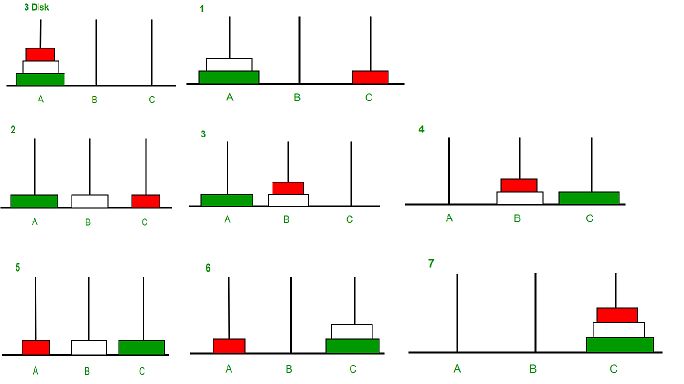

In [36]:
def toh(n, from_rod, to_rod, aux_rod):
    count = 0
    def helper(n, from_rod, to_rod, aux_rod):
        nonlocal count
        if n ==1:
            print("move disk " + str(n) + ' from rod '+str(from_rod) + ' to rod '+str(to_rod))
            count +=1
            return
        helper(n-1, from_rod, aux_rod, to_rod)
        print("move disk " + str(n) + " from rod " + str(from_rod) + " to rod " + str(to_rod))
        count +=1
        helper(n-1, aux_rod, to_rod, from_rod)
    helper(n, from_rod, to_rod, aux_rod)
    return count


toh(3,'A', 'C', 'B')

move disk 1 from rod A to rod C
move disk 2 from rod A to rod B
move disk 1 from rod C to rod B
move disk 3 from rod A to rod C
move disk 1 from rod B to rod A
move disk 2 from rod B to rod C
move disk 1 from rod A to rod C


7

In [50]:
def h(n, start, end, mid):
    count = 0
    
    def move(n, start, end):
        nonlocal count
        print("move disk " + str(n) + " from " + str(start) + " to " + str(end))
        count += 1
        return

    if n == 1:
        move(n, start, end)
    else:
        h(n-1, start, mid, end)
        move(n, start, end)
        count +=1
        h(n-1, mid, end, start)

    return count

h(3, "Start", "End", "midpoint")

move disk 1 from Start to End
move disk 2 from Start to midpoint
move disk 1 from End to midpoint
move disk 3 from Start to End
move disk 1 from midpoint to Start
move disk 2 from midpoint to End
move disk 1 from Start to End


2

1 hr 
- Dish core values
- SHL vendor
- two sections
- paper pencil 
- calculation 
- pattern
- logic question
- 
2nd section
- think about the core values from dish
- take your time
- evaluation for Dish's core values